## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  34.811366   178.887466  0.641250  3.526243  1.174887
1  78.808808   581.565063  0.273129  2.139516  1.038566
2  14.452785  1595.441576  0.551760  4.396171  1.624531
3  56.255891  1456.654909  0.616290  2.829983  1.533100
4  55.048381   317.257992  0.237298  7.411955  0.991215


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9272856	total: 66.9ms	remaining: 1m 6s
1:	learn: 0.9196309	total: 67.5ms	remaining: 33.7s
2:	learn: 0.9112001	total: 68ms	remaining: 22.6s
3:	learn: 0.9019935	total: 68.6ms	remaining: 17.1s
4:	learn: 0.8916964	total: 69.2ms	remaining: 13.8s
5:	learn: 0.8825466	total: 69.6ms	remaining: 11.5s
6:	learn: 0.8721151	total: 70.1ms	remaining: 9.94s
7:	learn: 0.8608378	total: 70.6ms	remaining: 8.75s
8:	learn: 0.8510350	total: 71ms	remaining: 7.82s
9:	learn: 0.8424810	total: 71.5ms	remaining: 7.08s
10:	learn: 0.8345183	total: 72ms	remaining: 6.47s
11:	learn: 0.8255675	total: 72.4ms	remaining: 5.96s
12:	learn: 0.8160967	total: 72.8ms	remaining: 5.53s
13:	learn: 0.8076452	total: 73.3ms	remaining: 5.16s
14:	learn: 0.7990086	total: 73.7ms	remaining: 4.84s
15:	learn: 0.7916866	total: 74.2ms	remaining: 4.56s
16:	learn: 0.7816994	total: 74.7ms	remaining: 4.32s
17:	learn: 0.7737465	total: 75.2ms	remaining: 4.1s
18:	learn: 0.7682896	total: 75.7ms	remaining: 3.91s

94:	learn: 0.3745375	total: 109ms	remaining: 1.03s
95:	learn: 0.3717120	total: 109ms	remaining: 1.03s
96:	learn: 0.3689896	total: 110ms	remaining: 1.02s
97:	learn: 0.3664923	total: 110ms	remaining: 1.01s
98:	learn: 0.3643289	total: 111ms	remaining: 1.01s
99:	learn: 0.3608520	total: 111ms	remaining: 998ms
100:	learn: 0.3578036	total: 111ms	remaining: 990ms
101:	learn: 0.3554169	total: 112ms	remaining: 983ms
102:	learn: 0.3528700	total: 112ms	remaining: 976ms
103:	learn: 0.3502779	total: 112ms	remaining: 968ms
104:	learn: 0.3478999	total: 113ms	remaining: 962ms
105:	learn: 0.3455158	total: 113ms	remaining: 956ms
106:	learn: 0.3436274	total: 114ms	remaining: 949ms
107:	learn: 0.3412358	total: 114ms	remaining: 942ms
108:	learn: 0.3384233	total: 115ms	remaining: 937ms
109:	learn: 0.3362083	total: 115ms	remaining: 931ms
110:	learn: 0.3337622	total: 115ms	remaining: 925ms
111:	learn: 0.3314422	total: 116ms	remaining: 921ms
112:	learn: 0.3289005	total: 116ms	remaining: 914ms
113:	learn: 0.3268

276:	learn: 0.1323657	total: 186ms	remaining: 486ms
277:	learn: 0.1317084	total: 187ms	remaining: 485ms
278:	learn: 0.1311296	total: 187ms	remaining: 484ms
279:	learn: 0.1305597	total: 187ms	remaining: 482ms
280:	learn: 0.1299931	total: 188ms	remaining: 481ms
281:	learn: 0.1295291	total: 188ms	remaining: 479ms
282:	learn: 0.1287993	total: 189ms	remaining: 478ms
283:	learn: 0.1282030	total: 189ms	remaining: 477ms
284:	learn: 0.1277341	total: 190ms	remaining: 475ms
285:	learn: 0.1270212	total: 190ms	remaining: 474ms
286:	learn: 0.1263352	total: 190ms	remaining: 472ms
287:	learn: 0.1257473	total: 191ms	remaining: 471ms
288:	learn: 0.1253549	total: 191ms	remaining: 470ms
289:	learn: 0.1248013	total: 191ms	remaining: 469ms
290:	learn: 0.1241408	total: 192ms	remaining: 467ms
291:	learn: 0.1236411	total: 192ms	remaining: 466ms
292:	learn: 0.1230849	total: 193ms	remaining: 465ms
293:	learn: 0.1225717	total: 193ms	remaining: 464ms
294:	learn: 0.1221154	total: 193ms	remaining: 462ms
295:	learn: 

480:	learn: 0.0705892	total: 274ms	remaining: 295ms
481:	learn: 0.0704738	total: 274ms	remaining: 295ms
482:	learn: 0.0704292	total: 275ms	remaining: 294ms
483:	learn: 0.0703853	total: 275ms	remaining: 293ms
484:	learn: 0.0701209	total: 275ms	remaining: 293ms
485:	learn: 0.0699427	total: 276ms	remaining: 292ms
486:	learn: 0.0697584	total: 276ms	remaining: 291ms
487:	learn: 0.0697155	total: 277ms	remaining: 290ms
488:	learn: 0.0696732	total: 277ms	remaining: 290ms
489:	learn: 0.0694481	total: 277ms	remaining: 289ms
490:	learn: 0.0692689	total: 278ms	remaining: 288ms
491:	learn: 0.0691425	total: 278ms	remaining: 287ms
492:	learn: 0.0691008	total: 279ms	remaining: 287ms
493:	learn: 0.0689455	total: 279ms	remaining: 286ms
494:	learn: 0.0687261	total: 280ms	remaining: 285ms
495:	learn: 0.0684738	total: 280ms	remaining: 285ms
496:	learn: 0.0683512	total: 280ms	remaining: 284ms
497:	learn: 0.0681871	total: 281ms	remaining: 283ms
498:	learn: 0.0681468	total: 281ms	remaining: 282ms
499:	learn: 

659:	learn: 0.0439453	total: 351ms	remaining: 181ms
660:	learn: 0.0437622	total: 352ms	remaining: 181ms
661:	learn: 0.0437306	total: 352ms	remaining: 180ms
662:	learn: 0.0435514	total: 353ms	remaining: 179ms
663:	learn: 0.0435201	total: 353ms	remaining: 179ms
664:	learn: 0.0433134	total: 354ms	remaining: 178ms
665:	learn: 0.0432823	total: 354ms	remaining: 178ms
666:	learn: 0.0431094	total: 354ms	remaining: 177ms
667:	learn: 0.0430938	total: 355ms	remaining: 176ms
668:	learn: 0.0430630	total: 355ms	remaining: 176ms
669:	learn: 0.0428631	total: 356ms	remaining: 175ms
670:	learn: 0.0426977	total: 356ms	remaining: 175ms
671:	learn: 0.0425230	total: 357ms	remaining: 174ms
672:	learn: 0.0424182	total: 357ms	remaining: 174ms
673:	learn: 0.0422624	total: 358ms	remaining: 173ms
674:	learn: 0.0422323	total: 358ms	remaining: 173ms
675:	learn: 0.0421305	total: 359ms	remaining: 172ms
676:	learn: 0.0419783	total: 359ms	remaining: 171ms
677:	learn: 0.0419487	total: 359ms	remaining: 171ms
678:	learn: 

900:	learn: 0.0202218	total: 456ms	remaining: 50.1ms
901:	learn: 0.0201739	total: 457ms	remaining: 49.6ms
902:	learn: 0.0200981	total: 457ms	remaining: 49.1ms
903:	learn: 0.0200289	total: 457ms	remaining: 48.6ms
904:	learn: 0.0199643	total: 458ms	remaining: 48.1ms
905:	learn: 0.0199145	total: 458ms	remaining: 47.5ms
906:	learn: 0.0198697	total: 459ms	remaining: 47ms
907:	learn: 0.0198485	total: 459ms	remaining: 46.5ms
908:	learn: 0.0197487	total: 460ms	remaining: 46ms
909:	learn: 0.0197344	total: 460ms	remaining: 45.5ms
910:	learn: 0.0197203	total: 460ms	remaining: 45ms
911:	learn: 0.0196498	total: 461ms	remaining: 44.5ms
912:	learn: 0.0196294	total: 461ms	remaining: 44ms
913:	learn: 0.0195603	total: 462ms	remaining: 43.5ms
914:	learn: 0.0195403	total: 462ms	remaining: 43ms
915:	learn: 0.0195205	total: 463ms	remaining: 42.4ms
916:	learn: 0.0194565	total: 463ms	remaining: 41.9ms
917:	learn: 0.0194344	total: 464ms	remaining: 41.4ms
918:	learn: 0.0194043	total: 464ms	remaining: 40.9ms
919

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

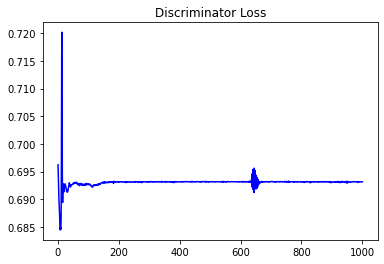

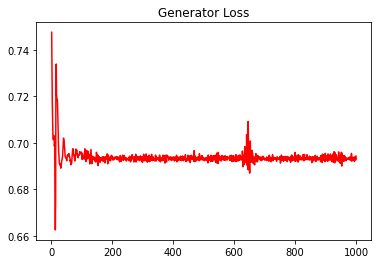

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3316926374591018


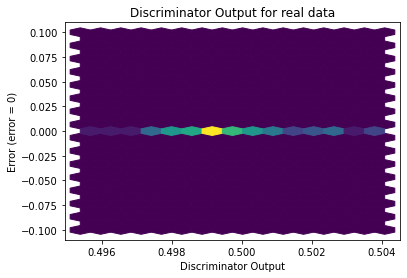

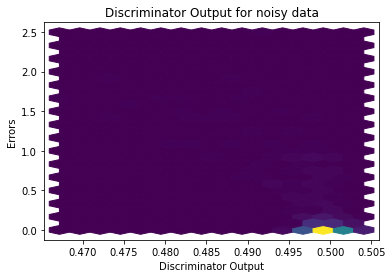

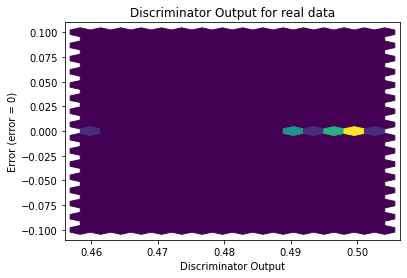

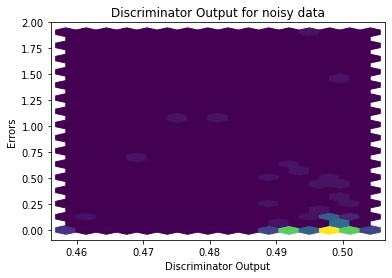

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


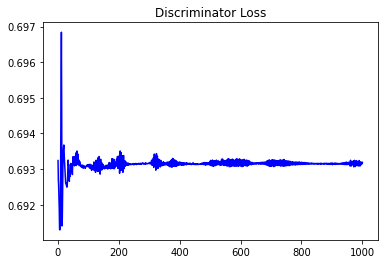

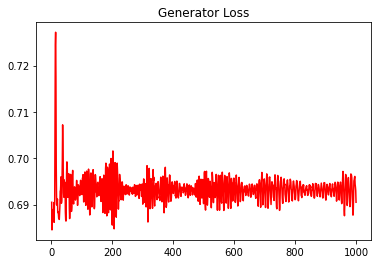

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3440028739518832


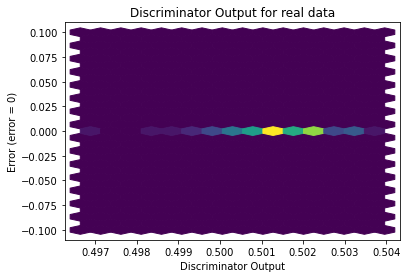

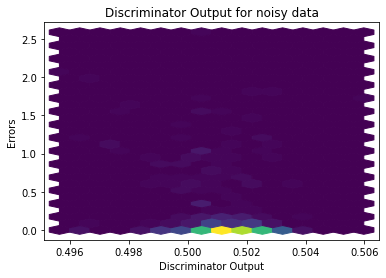

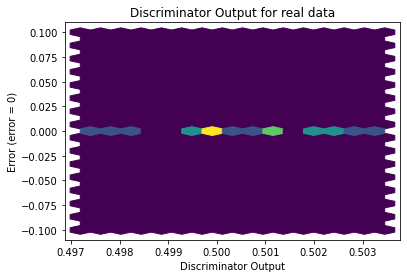

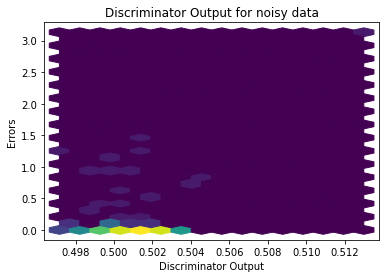

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1206]], requires_grad=True)
